<a href="https://colab.research.google.com/github/AayushKucheria/Reaktor-Communicating-Climate-Change/blob/main/Data%20exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the "Our World in Data" dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Download the data from the github repository

In [2]:
url = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df = pd.read_csv(url)

df.head(10)

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,0.0,0.015,0.0,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.00,0.070,NaN,0.011,NaN,0.0,0.099,0.0,0.009,NaN,NaN,0.021,NaN,NaN,NaN,0.063,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.036,NaN,NaN,0.063,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.70,0.007,NaN,0.012,NaN,0.0,0.191,0.0,0.010,NaN,NaN,0.026,NaN,NaN,NaN,0.066,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.061,NaN,NaN,0.129,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.00,0.000,NaN,0.012,NaN,0.0,0.282,0.0,0.009,NaN,NaN,0.032,NaN,NaN,NaN,0.060,NaN,NaN,0.004,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.093,NaN,NaN,0.189,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.00,0.015,NaN,0.013,NaN,0.0,0.388,0.0,0.010,NaN,NaN,0.038,NaN,NaN,NaN,0.068,NaN,NaN,0.005,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.131,NaN,NaN,0.257,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
5,AFG,Afghanistan,1954,0.106,NaN,0.00,0.000,NaN,0.013,NaN,0.0,0.495,0.0,0.010,NaN,NaN,0.043,NaN,NaN,NaN,0.064,NaN,NaN,0.005,NaN,NaN,0.008,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.174,NaN,NaN,0.321,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8151316.0,1.086636e+10,NaN,NaN,NaN
6,AFG,Afghanistan,1955,0.154,NaN,44.83,0.048,NaN,0.019,NaN,0.0,0.649,0.0,0.014,NaN,NaN,0.062,NaN,NaN,NaN,0.092,NaN,NaN,0.008,NaN,NaN,0.011,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.236,NaN,NaN,0.413,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8270992.0,1.107819e+10,NaN,NaN,NaN
7,AFG,Afghanistan,1956,0.183,NaN,19.05,0.029,NaN,0.022,NaN,0.0,0.832,0.0,0.016,NaN,NaN,0.062,NaN,NaN,NaN,0.121,NaN,NaN,0.007,NaN,NaN,0.014,NaN,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.298,NaN,NaN,0.534,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8398873.0,1.158124e+10,NaN,NaN,NaN
8,AFG,Afghanistan,1957,0.293,NaN,60.00,0.110,NaN,0.034,NaN,0.0,1.125,0.0,0.025,NaN,NaN,0.077,NaN,NaN,NaN,0.216,NaN,NaN,0.009,NaN,NaN,0.025,NaN,NaN,NaN,0.0,NaN,NaN,0.01,NaN,NaN,0.375,NaN,NaN,0.750,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535157.0,1.157897e+10,NaN,NaN,NaN
9,AFG,Afghanistan,1958,0.330,NaN,12.50,0.037,NaN,0.038,NaN,0.0,1.455,0.0,0.027,NaN,NaN,0.092,NaN,NaN,NaN,0.238,NaN,NaN,0.011,NaN,NaN,0.027,NaN,NaN,NaN,0.0,NaN,NaN,0.01,NaN,NaN,0.467,NaN,NaN,0.988,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8680097.0,1.223884e+10,NaN,NaN,NaN


Some basic info about the dataset

In [3]:
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))
# print("Column names:")
# for col in df.columns:
#   print(col)

Number of rows: 25204
Number of columns: 58


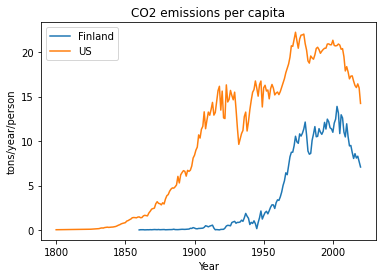

In [4]:
df_fin = df[df.country == "Finland"]
plt.plot(df_fin.year, df_fin.co2_per_capita, label = "Finland")

#for i in df.country.drop_duplicates():print(i)
df_us = df[df.country == "United States"]
plt.plot(df_us.year, df_us.co2_per_capita, label = "US")
plt.ylabel("tons/year/person")
plt.xlabel("Year")
plt.title("CO2 emissions per capita")
plt.legend()


Let's take a look at all countries

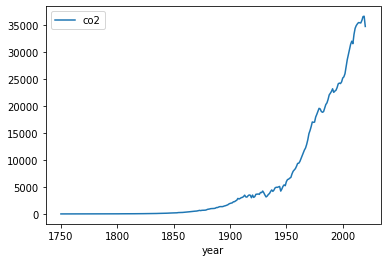

In [5]:
df[df["country"] == "World"].plot(x = "year", y = "co2")

CO2 per capita for each country


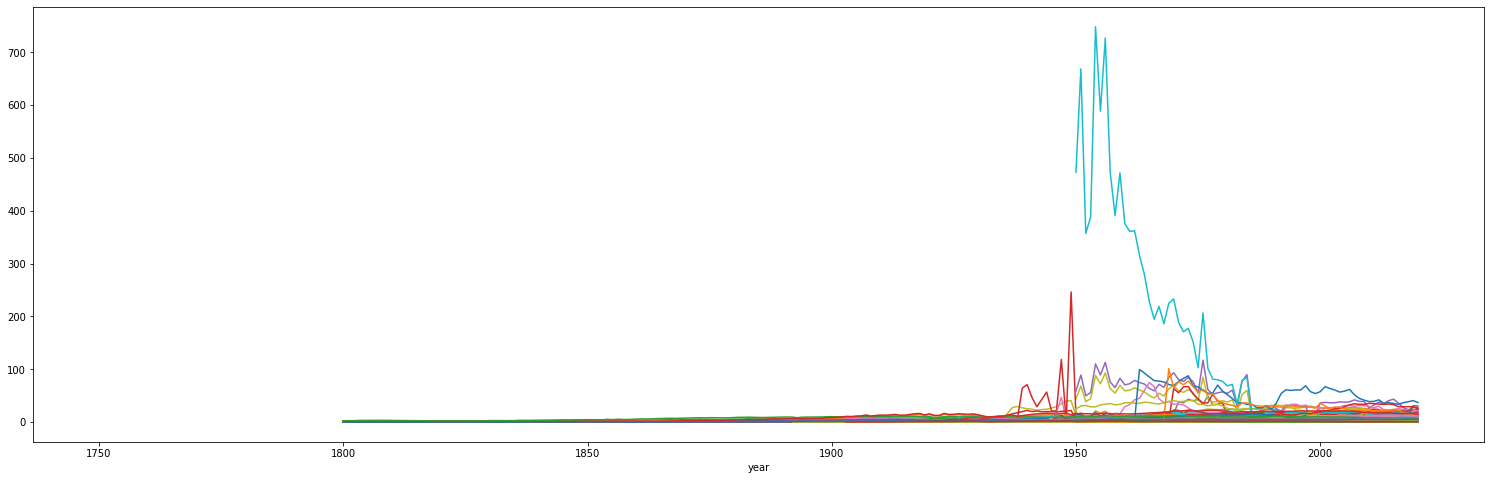

In [6]:
plt.figure(figsize = (26, 8))
dfy = df.set_index("year")
dfy.groupby("country")["co2_per_capita"].plot()
print("CO2 per capita for each country")

There seem to be some outliers. Perhaps oil exporters such as Quatar?

CO2 for each country


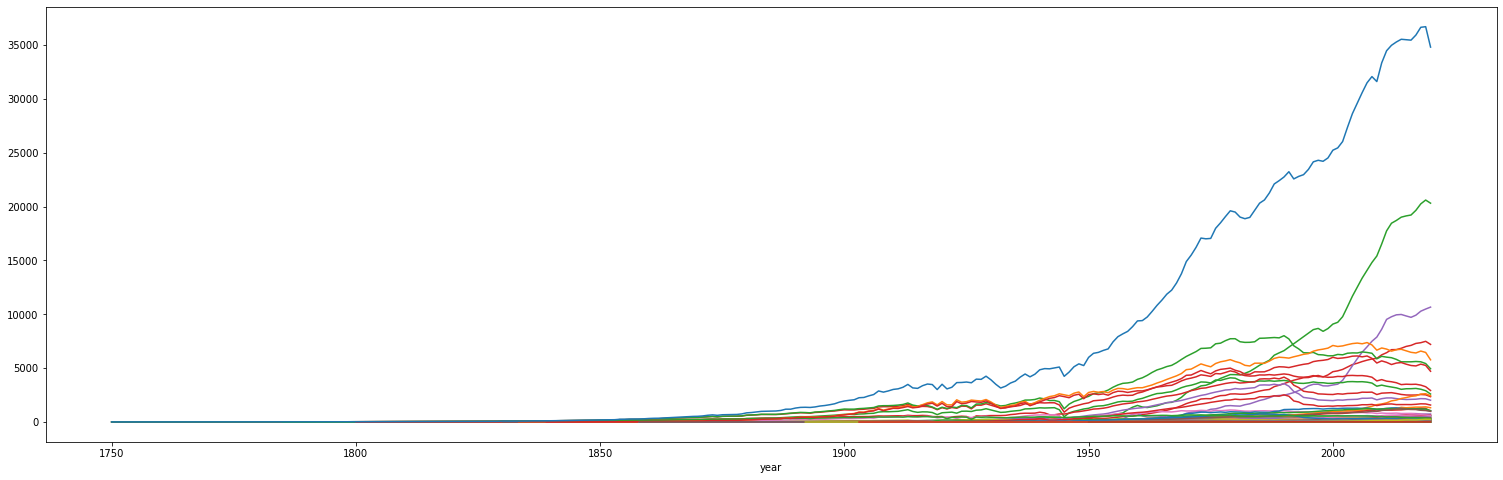

In [7]:
plt.figure(figsize = (26, 8))
dfy.groupby("country")["co2"].plot()
print("CO2 for each country")

Looks like there are some bigh countries (or continents) which keep emitting more and more.

In [8]:
df[["country", "co2", "co2_per_capita", "co2_growth_prct", "year"]][df.year == 2018].sort_values("co2", ascending=False).head(20)

,country,co2,co2_per_capita,co2_growth_prct,year
24941,World,36646.140,4.802,2.01,2018
1241,Asia,20254.370,4.442,3.06,2018
4721,China,10289.990,7.208,3.72,2018
1432,Asia (excl. China & India),7364.575,4.139,0.90,2018
16436,North America,6588.630,11.366,2.74,2018
7770,Europe,5593.057,7.485,-0.48,2018
24065,United States,5375.491,16.434,3.22,2018
6719,EU-28,3427.978,6.700,-2.27,2018
6448,EU-27,3046.089,6.852,-2.37,2018
10975,India,2599.806,1.922,6.82,2018


In [9]:
df[["country", "co2", "co2_per_capita", "co2_growth_prct", "year"]][df.year == 2018].sort_values("co2_per_capita", ascending=False).head(20)

,country,co2,co2_per_capita,co2_growth_prct,year
18588,Qatar,106.927,38.440,7.19,2018
22735,Trinidad and Tobago,40.475,29.122,1.32,2018
5493,Curacao,3.829,23.526,-13.49,2018
12515,Kuwait,95.575,23.101,0.45,2018
3631,Brunei,9.592,22.362,0.42,2018
2157,Bahrain,32.610,20.778,0.06,2018
15759,New Caledonia,5.785,20.663,8.23,2018
19685,Saudi Arabia,621.953,18.454,-2.73,2018
12296,Kazakhstan,317.280,17.319,3.04,2018
20179,Sint Maarten (Dutch part),0.722,17.212,-3.90,2018


Let's focus on just a few countries that might be interesting to a nordic audience.

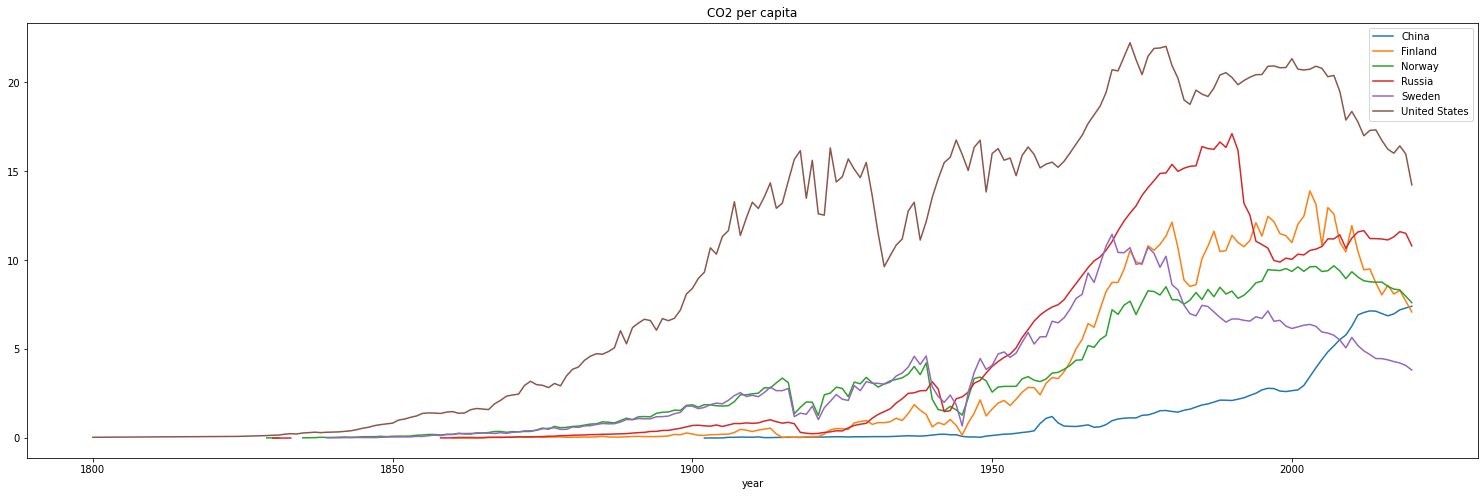

In [10]:
countries_of_interest = ["Finland", "Norway", "Sweden", "United States", "Russia", "China"]
places_of_interest = countries_of_interest + ["World", "Europe", "Asia", "Africa"]

df_of_interest = df[df["country"].isin(countries_of_interest)]

plt.figure(figsize = (26, 8))
dfy_of_interest = df_of_interest.set_index("year")
dfy_of_interest.groupby("country")["co2_per_capita"].plot(legend = True, title = "CO2 per capita")
print("")

Below is an attempt at an interactive visualization which allows the user to find a country they are intrested in and to see it's $CO_2$ emissions.  
I followed this tutorial: https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10

In [11]:
# !pip install pycountry_convert

In [12]:
# #function to get longitude and latitude data from country code

# from geopy.geocoders import Nominatim

# geolocator = Nominatim()

# def geolocate(country):
#     try:
#         # Geolocate the center of the country
#         loc = geolocator.geocode(country)
#         # And return latitude and longitude
#         return (loc.latitude, loc.longitude)
#     except:
#         # Return missing value
#         return (np.nan, np.nan)


# df_map = df[["year", "country", "co2", "co2_per_capita", "co2_growth_prct", "methane"]]
# df_map = df_map[df_map.year == 2019]

# df_map["geolocation"] = df_map["country"].map(lambda x: geolocate(x))

In [13]:
# # Create a world map to show distributions of users 
# import folium
# from folium.plugins import MarkerCluster

# #empty map
# world_map= folium.Map(tiles="cartodbpositron")
# marker_cluster = MarkerCluster().add_to(world_map)

# #for each coordinate, create circlemarker of desired value
# for i in range(len(df_map)):
#         lat, long = df_map.iloc[i]['geolocation']
#         radius=5
#         popup_text = """Country : {}<br>
#                     CO2 emissions : {}<br>"""
#         popup_text = popup_text.format(df_map.iloc[i]['country'],
#                                    df_map.iloc[i]['co2']
#                                    )
#         if(not np.isnan(lat)):
#           folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

# #show the map
# world_map

## More overarching stuff

In [14]:
import seaborn as sns

In [15]:
df.columns

Index(['iso_code', 'country', 'year', 'co2', 'consumption_co2',
       'co2_growth_prct', 'co2_growth_abs', 'trade_co2', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'other_co2_per_capita', 'trade_co2_share',
       'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'cumulative_cement_co2', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2',
       'cumulative_other_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_c

In [16]:
df['co2'].describe()

count    23949.000000
mean       267.861942
std       1521.680894
min          0.000000
25%          0.528000
50%          4.857000
75%         42.818000
max      36702.503000
Name: co2, dtype: float64

Correlation matrix for all variables

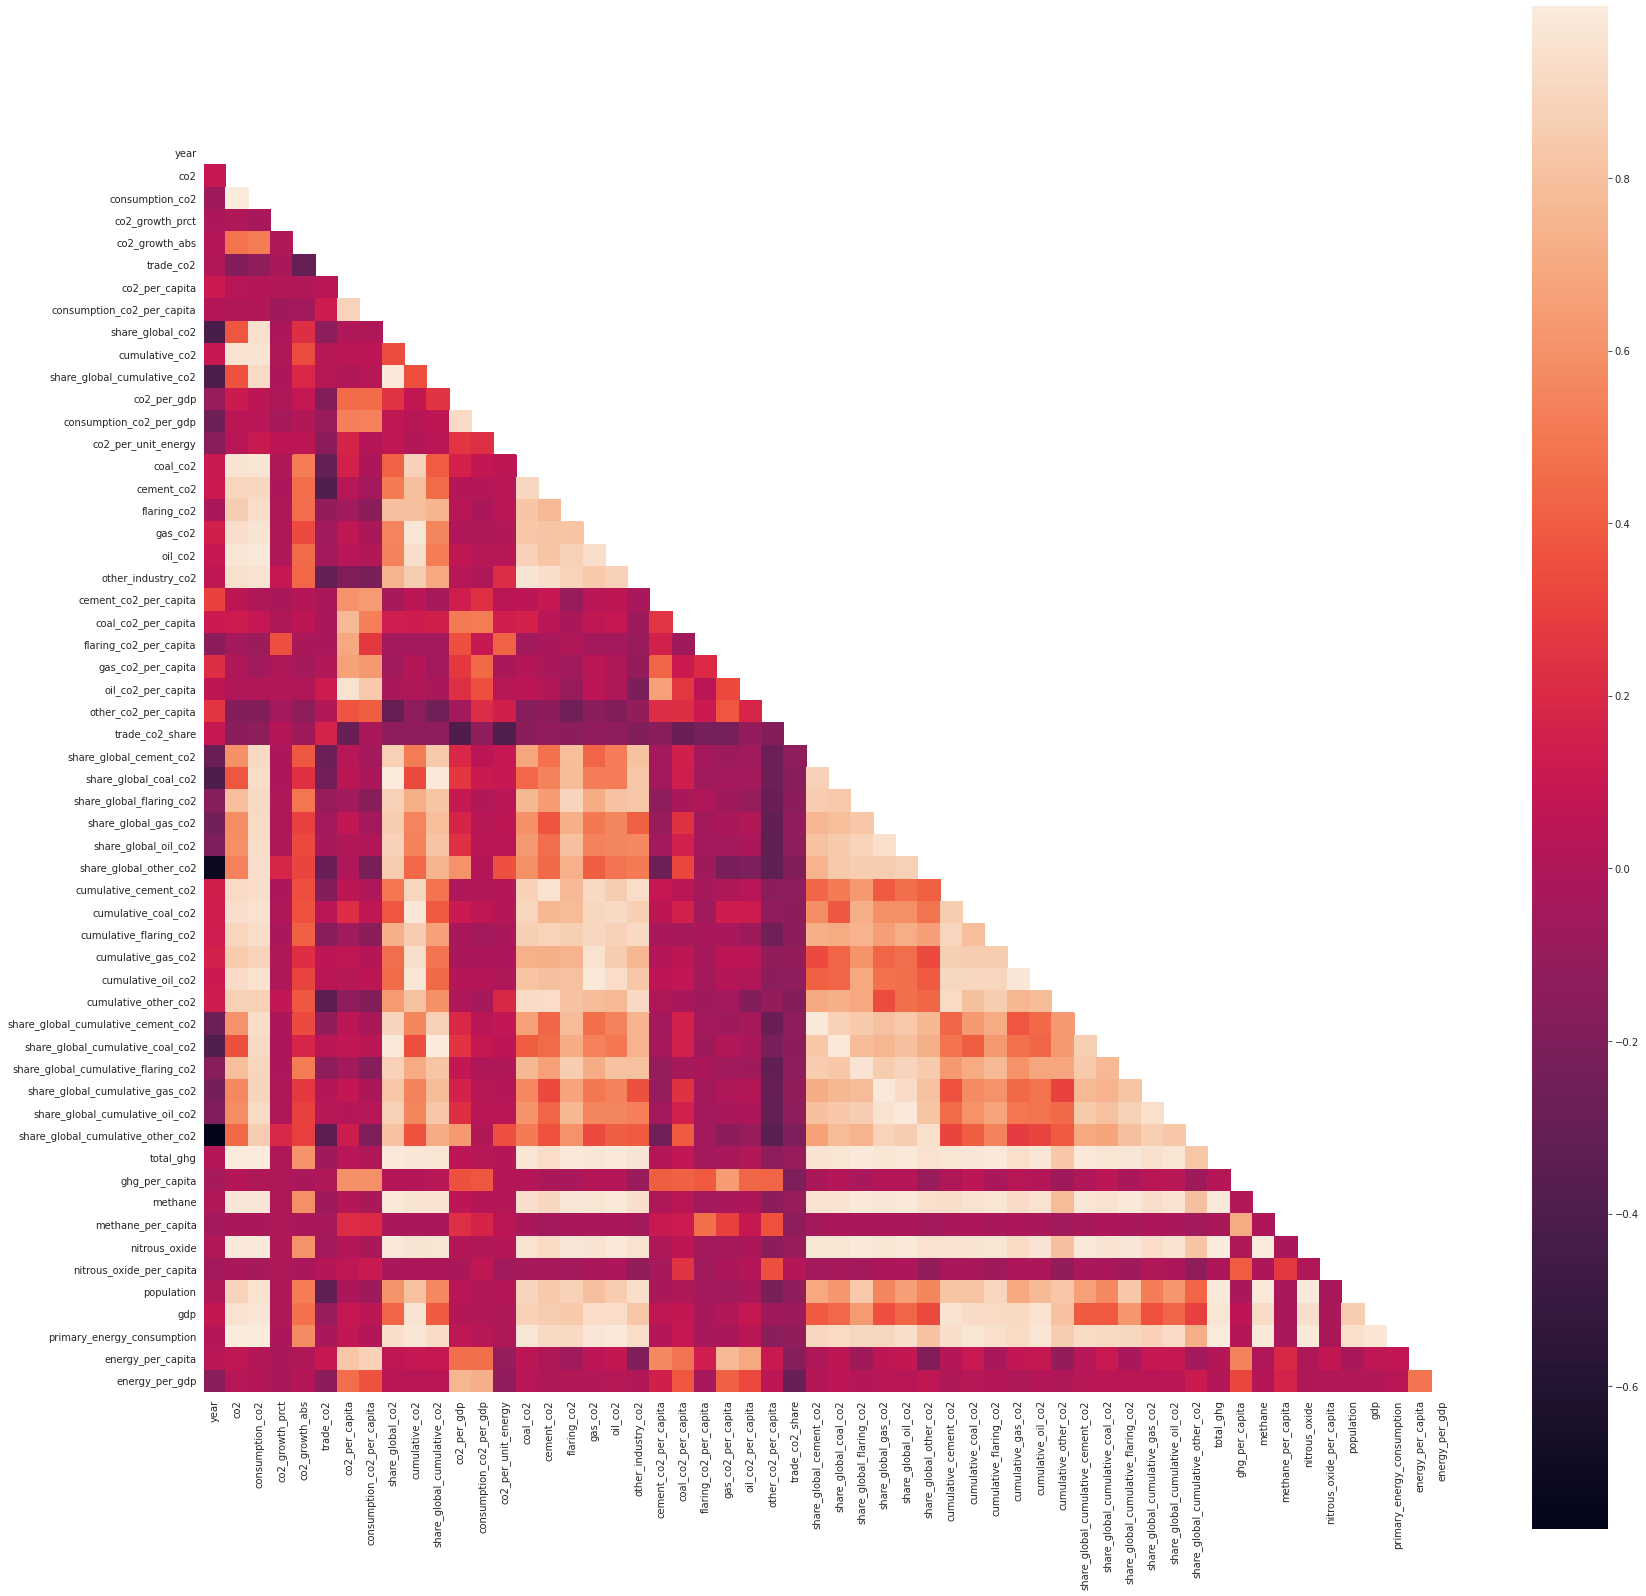

In [17]:
corr = df.corr()
corr = pd.DataFrame(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(28, 28))
    sns.heatmap(corr, mask=mask, square=True);

Highly positively correlated (>- 0.9) variables



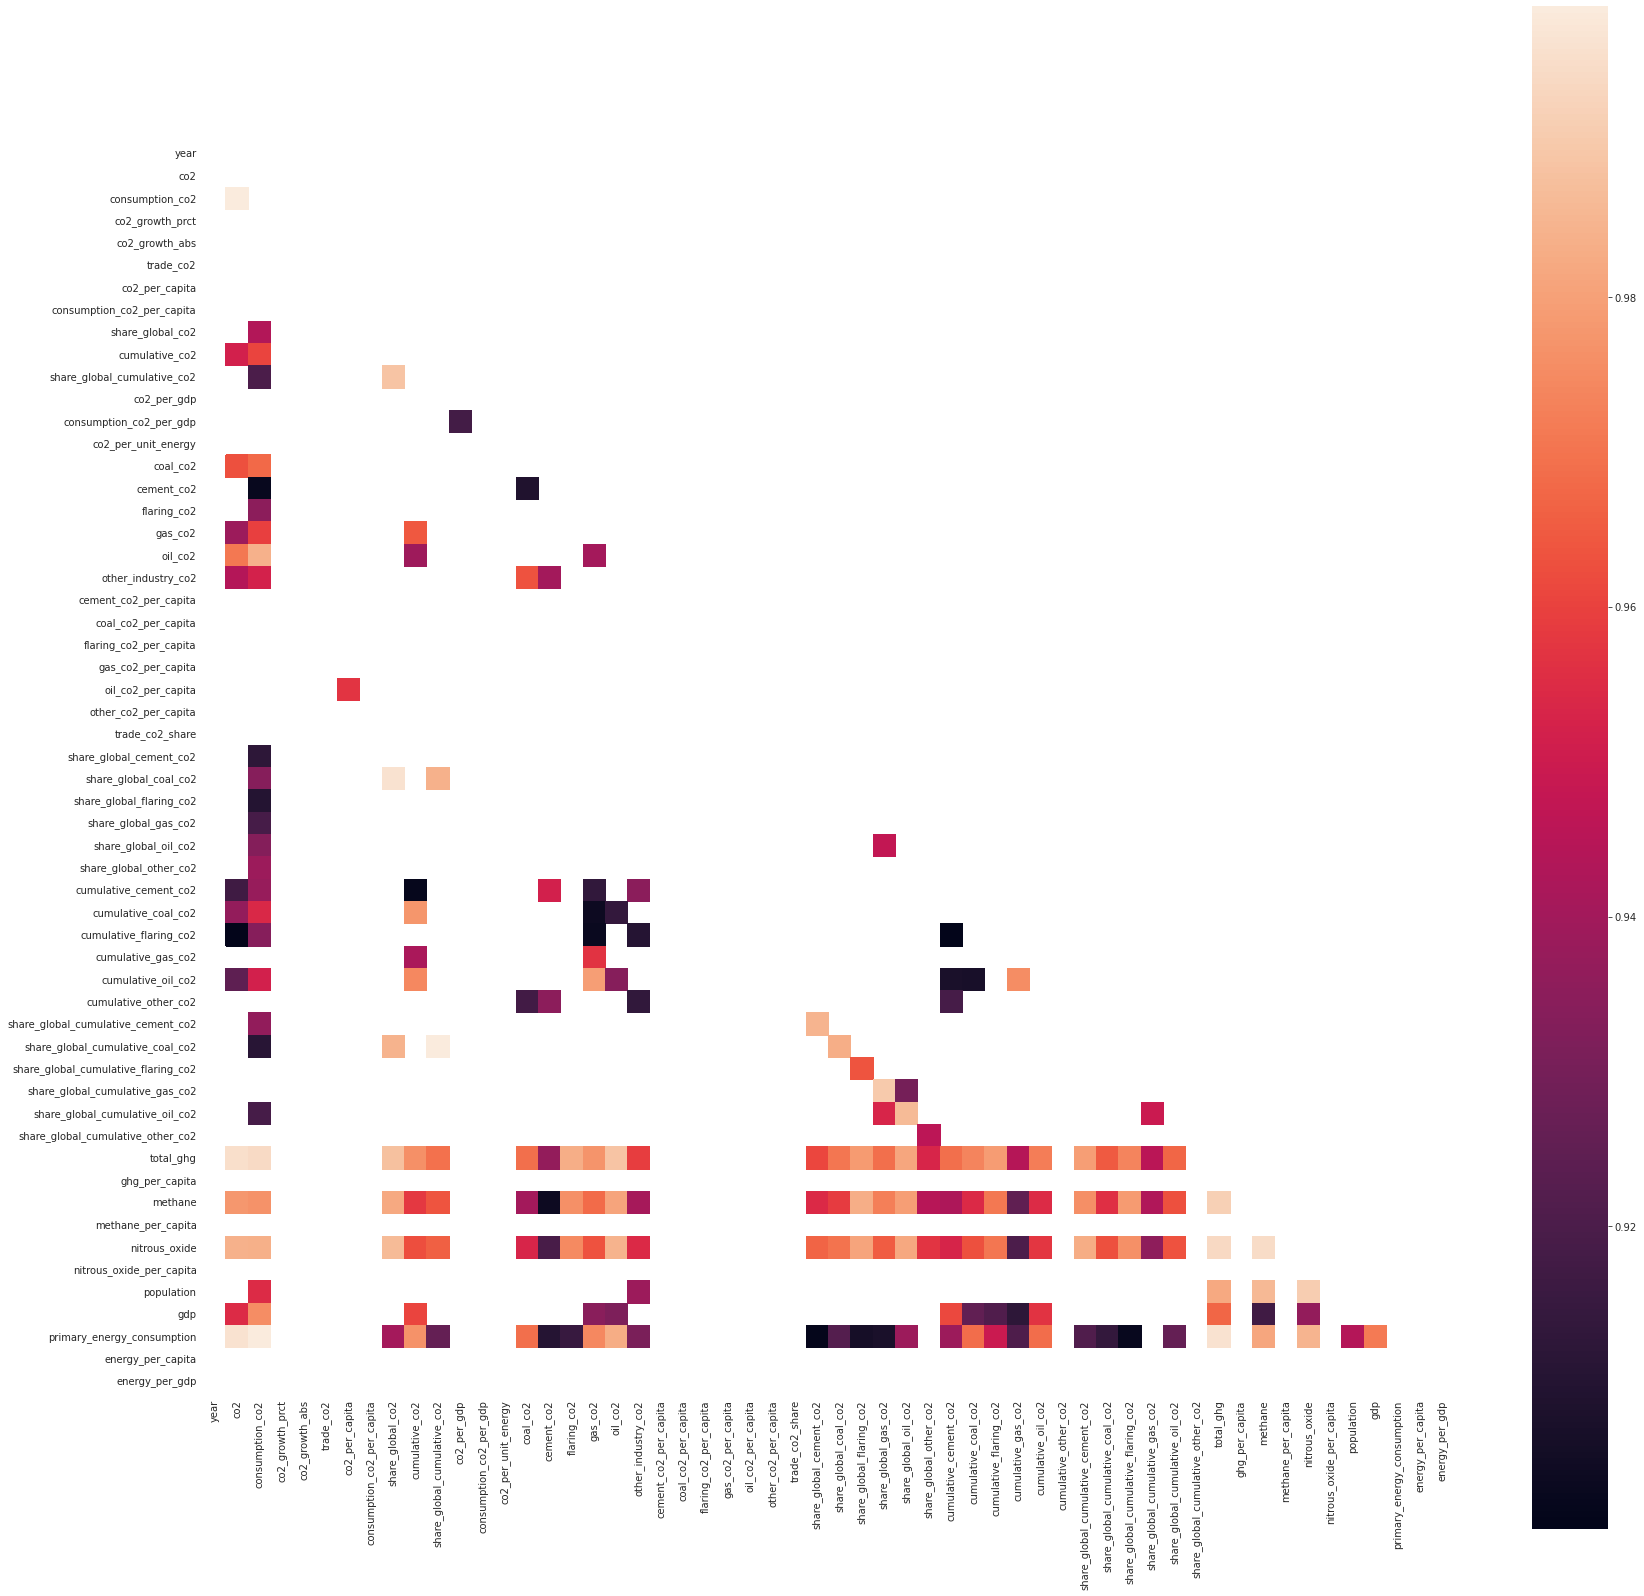

In [18]:
pos = corr[corr >= .9]
mask = np.zeros_like(pos)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(28, 28))
    sns.heatmap(pos, mask=mask, square=True);

Decently negatively correlated (<= -0.3) variables


In [19]:
rows, cols = corr.shape
flds = list(corr.columns)
c = corr.values

for i in range(cols):
    for j in range(i+1, cols):
        if c[i,j] <= -0.3:
            print(flds[i], ' ', flds[j], ' ', c[i,j])

year   share_global_co2   -0.4222763668953728
year   share_global_cumulative_co2   -0.4084631468868427
year   share_global_coal_co2   -0.403803398851633
year   share_global_other_co2   -0.7235569760133104
year   share_global_cumulative_coal_co2   -0.3875414832436975
year   share_global_cumulative_other_co2   -0.7650088032969328
co2_growth_abs   trade_co2   -0.3088530217037383
trade_co2   coal_co2   -0.30850574142177756
trade_co2   cement_co2   -0.3866941279368232
trade_co2   other_industry_co2   -0.3038201759196625
trade_co2   cumulative_other_co2   -0.3428320313038341
trade_co2   share_global_cumulative_other_co2   -0.3399756695839957
trade_co2   population   -0.32837802512400993
share_global_co2   other_co2_per_capita   -0.3026425344818295
co2_per_gdp   trade_co2_share   -0.40415374391902364
co2_per_unit_energy   trade_co2_share   -0.3922614638234143
other_co2_per_capita   share_global_gas_co2   -0.31187321253597966
other_co2_per_capita   share_global_oil_co2   -0.3289236456348296
ot

Top 5 co2 emission outliers wrt mean, median, std, kurt, and skew




In [20]:
continents = ["Asia", "EU-27", "EU-28", "Europe", "North America", 'Asia (excl. China & India)', "International transport", "Europe (excl. EU-27)", "Europe (excl. EU-28)", "Kuwaiti Oil Fires", "World"]
df_country = df[~df["country"].isin(continents)]
df_country['co2']=df_country['co2'].fillna(0)

d = {}
# Group dataframe by country and find countries with highest CO2 emissions
for country, df_country_single in df_country.groupby("country"):
    d[country] = {
        "mean": df_country_single["co2"].mean(),
        "median": df_country_single["co2"].median(),
        "std": df_country_single["co2"].std(),
        "skew": df_country_single["co2"].skew(),
        "kurt": df_country_single["co2"].kurt(),
    }

def print_top_5(d, key):
    print("\n\nTop 5 countries with highest {} Co2 emissions".format(key))
    top_5 = sorted(d.items(), key=lambda x: x[1][key], reverse=True)[:5]
    # return top_5

    for country, value in top_5:
        print(country, value[key])

print_top_5(d, "mean")
print_top_5(d, "median")
print_top_5(d, "std")
print_top_5(d, "skew")
print_top_5(d, "kurt")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until




Top 5 countries with highest mean Co2 emissions
China 1930.852590163934
United States 1885.6248325791848
Russia 603.8960628272251
Japan 428.9226470588236
Germany 404.52234934497807


Top 5 countries with highest median Co2 emissions
United States 1257.7730000000001
China 459.922
Germany 331.92900000000003
United Kingdom 315.291
South America 140.643


Top 5 countries with highest std Co2 emissions
China 3026.8215171613774
United States 2079.36191456331
Russia 789.0857217617618
India 609.7747362689811
Japan 495.6286506197069


Top 5 countries with highest skew Co2 emissions
Puerto Rico 10.0498756211209
Ryukyu Islands 6.591883798911946
Laos 3.6766875691978
Mongolia 3.3868004813711203
Leeward Islands 3.0313445845976044


Top 5 countries with highest kurt Co2 emissions
Puerto Rico 101.00000000000018
Ryukyu Islands 47.68483694489756
Laos 13.728300202290967
Mongolia 12.974407052859965
Leeward Islands 7.9513422601299


Could possibly do this process (outliers -> viz) for more variables (per_capita, coal, etc, etc)

## Test out linear regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
fi = df[df.country == "Finland"]
fi = fi[df.year > 1980]
fi = fi[df.year < 2019]
fi = fi[["country", "year", "co2", "co2_growth_prct", "population", "gdp", "energy_per_capita"]]
fi["gdp_per_capita"] = fi["gdp"] / fi["population"]
fi.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,country,year,co2,co2_growth_prct,population,gdp,energy_per_capita,gdp_per_capita
8499,Finland,1981,51.403,-11.59,4809807.0,1.004872e+11,54867.679,20892.157698
8500,Finland,1982,42.976,-16.39,4835102.0,1.037549e+11,53888.911,21458.683774
8501,Finland,1983,41.463,-3.52,4862171.0,1.065554e+11,53040.244,21915.187666


[-1.39014240e-05 -2.70751825e-04  1.52089123e-03]
36.436696772595425


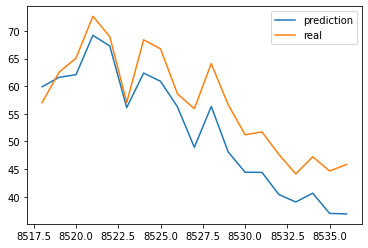

In [23]:
predict_from = 2000
training = fi[fi.year < predict_from]
test = fi[fi.year >= predict_from].copy()
y = training.co2
X = training[["population", "gdp_per_capita", "energy_per_capita"]]

reg = LinearRegression().fit(X, y)

print(reg.coef_)
print(reg.intercept_)

prediction = reg.predict(test[["population", "gdp_per_capita", "energy_per_capita"]])
real = test.co2

result = pd.DataFrame({"year": test.year, "prediction": prediction, "real":real})

result[["prediction", "real"]].plot()


# Testing a simpler univariate model

[0.98145088]
-1898.8498771929817


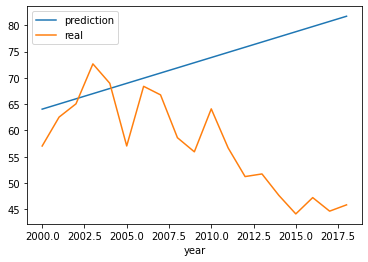

In [24]:
X = training.year.values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)

print(reg.coef_)
print(reg.intercept_)

prediction = reg.predict(test.year.values.reshape(-1, 1))
real = test.co2

result_simple = pd.DataFrame({"year": test.year, "prediction": prediction, "real":real})

result_simple.plot(x = "year")

# Testing out Facebook Prophet

In [25]:
import fbprophet

train_data = training[["year", "co2"]].copy()
train_data["year"] = pd.to_datetime(train_data["year"], format="%Y")
train_data.columns = ["ds","y"]

test_data = pd.DataFrame(pd.to_datetime(test["year"], format= "%Y"))
test_data.columns = ["ds"]


model = fbprophet.Prophet()
model.fit(train_data)

forecast = model.predict(test_data)

forecast.head(3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,23.356131,58.692277,67.650413,23.356131,23.356131,39.524106,39.524106,39.524106,39.524106,39.524106,39.524106,0.0,0.0,0.0,62.880237
1,2001-01-01,24.356439,62.052657,70.676628,24.356439,24.356439,42.137712,42.137712,42.137712,42.137712,42.137712,42.137712,0.0,0.0,0.0,66.494151
2,2002-01-01,25.354014,62.091345,70.853546,25.354014,25.354014,41.191332,41.191332,41.191332,41.191332,41.191332,41.191332,0.0,0.0,0.0,66.545346


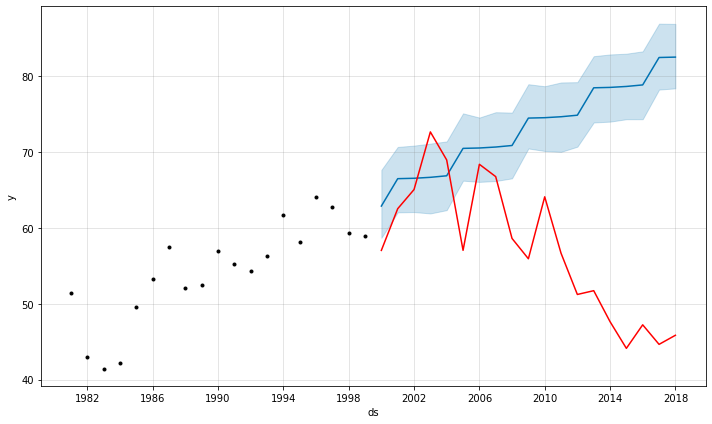

In [26]:
fig = model.plot(forecast)
plt.plot( test_data.ds, test["co2"], c="red")

# Comparing different methods

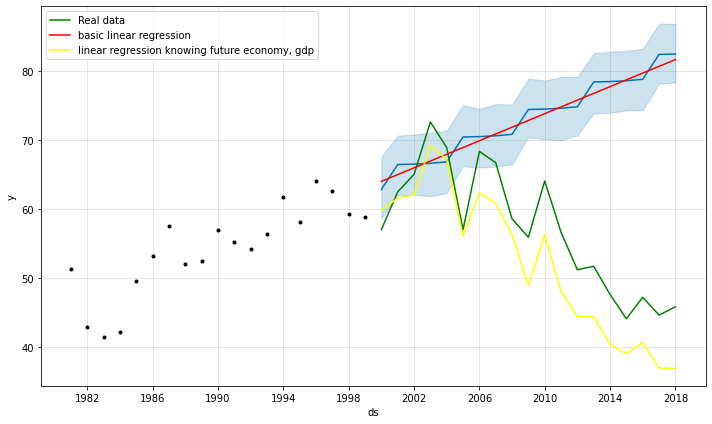

In [27]:
model.plot(forecast)
plt.plot(test_data.ds, test["co2"], c="green", label = "Real data")
plt.plot(pd.to_datetime(result_simple.year, format="%Y"), result_simple.prediction, c = "red", label = "basic linear regression")
plt.plot(pd.to_datetime(result.year, format="%Y"), result.prediction, c = "yellow", label = "linear regression knowing future economy, gdp")
plt.legend()

# Calculating the uncertainty in linear regression
There are two sources of uncertainty:
* (Epistemic) Systematic error of measurement/estimation in our data (about 5%)
* (Aleatoric) Uncertainty in the "true" values due to random events happening that affect the GHG output.

Linear regression calculations come from https://science.widener.edu/svb/stats/regress.html

In [28]:
cov_mat = training[["year", "co2"]].cov()
s_xy = cov_mat["year"]["co2"]  * (len(y) - 1)
s_xx = cov_mat["year"]["year"] * (len(y) - 1)  # Varience but without dividing by the number of samples
s_yy = cov_mat["co2"]["co2"]   * (len(y) - 1)
y_mean = training["co2"].mean()
x_mean = training["year"].mean()

m = s_xy / s_xx   # slope
b = y_mean - (m * x_mean)

print("m: " + str(m) + ", b: " + str(b))

s_r = np.sqrt( (s_yy - (m*m*s_xx)) / (len(y) - 2))

# Uncertainty in y as a function of x
def s_y(x):
  s_y = s_r * np.sqrt(1 + 1/len(y) + (x - x_mean) ** 2 / s_xx)
  return(s_y)


m: 0.9814508771929823, b: -1898.8498771929821


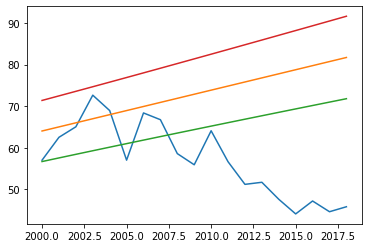

In [29]:
add_5_percent_uncertainty = True   # Select True or False

multipliers = {"lFalse": 1, "uFalse": 1, "lTrue": 0.95, "uTrue": 1.05}
lower_multiplier = multipliers["l" + str(add_5_percent_uncertainty)]
upper_multiplier = multipliers["u" + str(add_5_percent_uncertainty)]


test["co2_hat"] = m * test["year"] + b
test["co2_hat_lower"] = test["co2_hat"] * lower_multiplier - s_y(test.year)
test["co2_hat_upper"] = test["co2_hat"] * upper_multiplier + s_y(test.year)

plt.plot(test.year, test.co2)
plt.plot(test.year, test.co2_hat)
plt.plot(test.year, test.co2_hat_lower)
plt.plot(test.year, test.co2_hat_upper)


# Compare the uncertainty to prophet

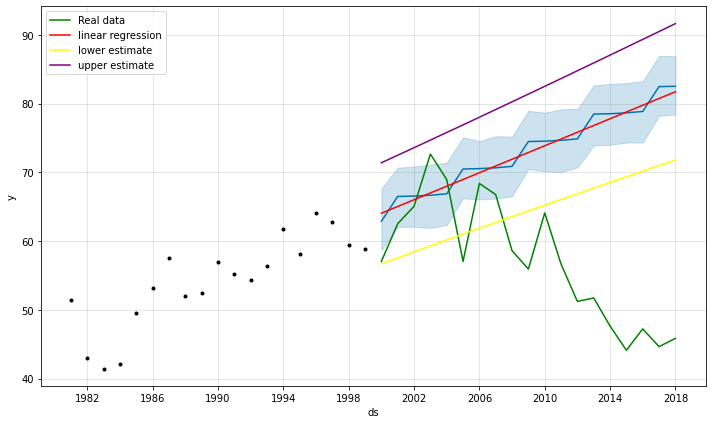

In [30]:
model.plot(forecast)
plt.plot(test_data.ds, test["co2"], c="green", label = "Real data")
plt.plot(pd.to_datetime(result_simple.year, format="%Y"), test.co2_hat, c = "red", label = "linear regression")
plt.plot(pd.to_datetime(result.year, format="%Y"), test.co2_hat_lower, c = "yellow", label = "lower estimate")
plt.plot(pd.to_datetime(result.year, format="%Y"), test.co2_hat_upper, c = "purple", label = "upper estimate")

plt.legend()

## Test out predictions using data from years before

In [31]:
shift_by = 5
fi["co2_future"] = fi["co2"].shift(-shift_by)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


[ 1.63069285e-04  5.81744523e-04  9.99693991e-04 -3.40915276e+00
 -4.20901285e-01 -1.13730045e-01]
5973.53889207735


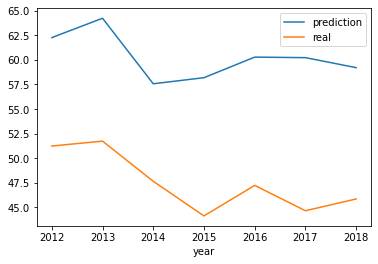

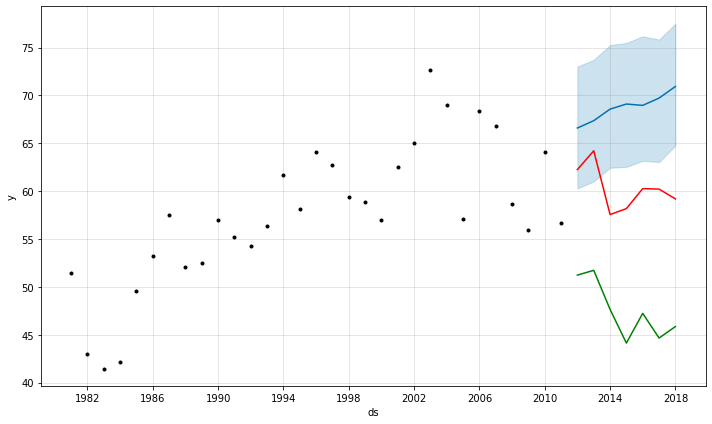

In [32]:
predict_from = 2012
training = fi[fi.year < predict_from]
test = fi[fi.year >= predict_from].copy()
y = training.co2
X = training[["population", "gdp_per_capita", "energy_per_capita"]]

import fbprophet

train_data = training[["year", "co2"]].copy()
train_data["year"] = pd.to_datetime(train_data["year"], format="%Y")
train_data.columns = ["ds","y"]

test_data = pd.DataFrame(pd.to_datetime(test["year"], format= "%Y"))
test_data.columns = ["ds"]


model = fbprophet.Prophet()
model.fit(train_data)

forecast = model.predict(test_data)




training2 = fi[fi.year < predict_from - shift_by].copy()
test2 = fi[fi.year >= predict_from - shift_by].copy()
y = training2.co2_future
X = training2[["population", "gdp_per_capita", "energy_per_capita", "year", "co2", "co2_growth_prct"]]

reg = LinearRegression().fit(X, y)

print(reg.coef_)
print(reg.intercept_)

prediction = reg.predict(test2[["population", "gdp_per_capita", "energy_per_capita", "year", "co2", "co2_growth_prct"]])[:len(test2) - shift_by]
real = test2.co2_future[:len(test2) - shift_by]

result = pd.DataFrame({"year": test2.year[:len(test2) - shift_by] + shift_by, "prediction": prediction, "real":real})

result.plot(x = "year", y = ["prediction", "real"])

fig = model.plot(forecast)
plt.plot( test_data.ds, test["co2"], c="green")
plt.plot( test_data.ds, prediction, c = "red")

In [33]:
test_data.ds.tail(14)

8530   2012-01-01
8531   2013-01-01
8532   2014-01-01
8533   2015-01-01
8534   2016-01-01
8535   2017-01-01
8536   2018-01-01
Name: ds, dtype: datetime64[ns]

In [119]:
# Trend Analysis
fi = df[df.country == "Sweden"]
fi = fi[df.year > 1980]
fi = fi[df.year < 2019]
fi = fi[["country", "year", "co2", "co2_growth_prct", "population", "gdp", "energy_per_capita"]]
fi["gdp_per_capita"] = fi["gdp"] / fi["population"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [128]:
predict_from = 2000
offset_here = 2
training = fi[fi.year < predict_from] # Offset = 2
test = fi[fi.year >= predict_from].copy()
y_train = training.co2
X_train = training[["energy_per_capita"]] # This has a direct correlation. The others (population and gdp) not so much.
y_test = test.co2
X_test = test[["energy_per_capita"]]

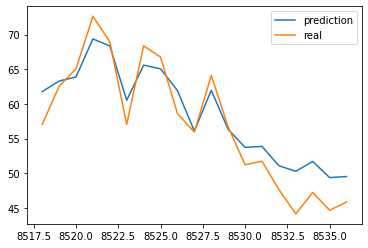

In [129]:
reg = LinearRegression().fit(X_train, y_train)
prediction = reg.predict(X_test)

result = pd.DataFrame({"year": test.year, "prediction": prediction, "real":y_test})
result[["prediction", "real"]].plot()

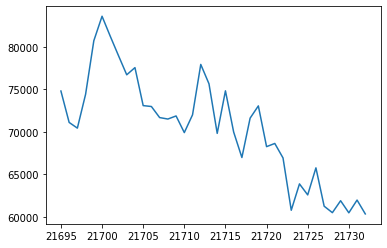

In [37]:
fi.energy_per_capita.plot()

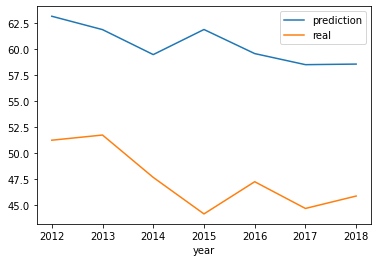

In [130]:
shift_by = 5
fi["co2_future"] = fi["co2"].shift(-shift_by)

predict_from = 2012


training = fi[fi.year < predict_from - shift_by].copy()
test = fi[fi.year >= predict_from - shift_by].copy()
X = training[["energy_per_capita", "year"]]
y_train = training.co2_future
X_train = training[["energy_per_capita"]] # This has a direct correlation. The others (population and gdp) not so much.
y_test = test.co2_future[:len(test2) - shift_by]
X_test = test[["energy_per_capita"]]

reg = LinearRegression().fit(X_train, y_train)

prediction = reg.predict(X_test)[:len(X_test) - shift_by]

result = pd.DataFrame({"year": test.year[:len(test) - shift_by] + shift_by, "prediction": prediction, "real":y_test})

result.plot(x = "year", y = ["prediction", "real"])


# Final prediction

intercept9040.03102398109
coefficient[-3.59845488e+00 -1.70975206e+00  2.01106015e+00 -2.95481942e-05
 -2.31314745e-10  1.11981710e-02]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



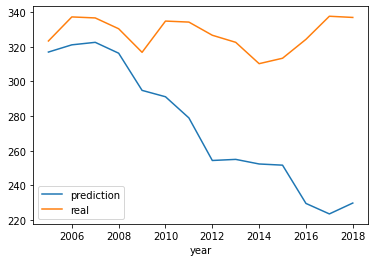

In [166]:
shift_by = 5

fi = df[df.country == "Poland"]
fi = fi[df.year > 1980]
fi = fi[df.year < 2019]
fi = fi[["country", "year", "co2", "co2_growth_prct", "population", "gdp", "energy_per_capita"]]
fi["gdp_per_capita"] = fi["gdp"] / fi["population"]
fi["co2_now"] = fi["co2"].shift(-shift_by) # All other variables are from the past
fi["year"] = fi.year.shift(-shift_by)


predict_from = 2005


training = fi[fi.year < predict_from].copy()
test = fi[fi.year >= predict_from].copy()

y_train = training.co2_now
X_train = training[["year", "co2", "co2_growth_prct", "population", "gdp", "energy_per_capita"]]
y_test = test.co2_now
X_test = test[["year", "co2", "co2_growth_prct", "population", "gdp", "energy_per_capita"]]

reg = LinearRegression().fit(X_train, y_train)

prediction = reg.predict(X_test)

result = pd.DataFrame({"year": test.year, "prediction": prediction, "real":y_test})

result.plot(x = "year", y = ["prediction", "real"])

print("intercept" + str(reg.intercept_))
print("coefficient" + str(reg.coef_))


In [244]:
country = "Europe"
predict_time = 5
train_from = 1990

fi = df[df.country == country]
fi = fi[["country", "year", "co2", "co2_growth_prct", "population", "energy_per_capita"]]
fi = fi[df.year > train_from]
available_data_year = fi[~ fi.isnull().any(axis = 1)].year.max()
years_cut_off = fi.year.max() - available_data_year
shift_by = predict_time + years_cut_off
fi["co2_now"] = fi["co2"].shift(-shift_by) # All other variables are from the past
fi = fi[df.year < available_data_year]


predict_from = available_data_year + 1
print(predict_from)

training = fi[fi.year < predict_from - shift_by].copy()
test = fi[fi.year >= predict_from - shift_by].copy()

y_train = training.co2_now
X_train = training[["year", "co2", "co2_growth_prct", "population", "energy_per_capita"]]
X_test = test[["year", "co2", "co2_growth_prct", "population", "energy_per_capita"]]

reg = LinearRegression().fit(X_train, y_train)
prediction = reg.predict(X_test)
result = pd.DataFrame({"year": test.year + shift_by, "prediction": prediction})

result

2020


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,year,prediction
7766,2020,5363.713593
7767,2021,5318.454644
7768,2022,5231.367207
7769,2023,5146.383453
7770,2024,5070.098294
